# Introduction to Statistics

Gerard Tromp, Prof Bioinformatics, FMHS Stellenbosch

2018-02-26

## Statistics: Data analysis

### Descriptive Statistics
<span style="color:red"><b>A statistic is a single value that summarizes an aspect of data from a sample</b></span>
- What statistics are you aware of?

- Sometimes it is necessary to use graphical summaries of data

### Some data

A class of university students was asked to self-report their weight:





#### Some data

Males: 
                         
|  A |  B |  C |  D |  E |  F |  G | H  |  I |  J |  K |  L |  M |  N |  O |  P |  Q |  R |  S |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 80 | 85 | 71 | 63 | 65 | 68 | 70 | 77 | 64 | 75 | 59 | 82 | 70 | 60 | 70 | 70 | 68 | 65 | 55 | 
| 68 | 85 | 59 | 60 | 98 | 82 | 65 | 64 | 67 | 70 | 68 | 89 | 75 | 68 | 85 | 68 | 80 | 77 | 84 | 
| 75 | 75 | 70 | 70 | 65 | 70 | 64 | 85 | 70 | 73 | 82 | 62 | 70 | 68 | 80 | 73 | 80 | 66 | 70 | 

#### Some data

Females:
    
|  A |  B |  C |  D |  E |  F |  G |  H |  I |  J |  J |  L | 
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | 
| 65 | 60 | 50 | 68 | 60 | 50 | 65 | 60 | 68 | 53 | 55 | 54 | 
| 65 | 52 | 65 | 60 | 46 | 53 | 57 | 68 | 63 | 55 | 55 | 57 | 
| 60 | 55 | 43 | 50 | 55 | 54 | 53 | 52 | 57 | 55 |    |    |

### Graph of weights (1)
One of the simplest representations of small sets of data is the "dot plot"

**Dot plots.** These are useful for showing the distribution of a single scale variable. The data are binned, but, instead of one value for each bin (like a count), all of the points in each bin are displayed and stacked. These graphs are sometimes called *density plots*.

**Note:** there is no standard implementation of a dot plot in python, we will therefore simply examine a figure generated in another application.

### Graph of weights (2)

![Class Weights](static/Figures/StudentWeight_DotPlot.png "Dot Plot of Weights")


Observations:
1. "Lumping" self-reported data show rounding to convenient numbers (5's and 10's)
2. Some outliers
3. Separating by student sex makes the distributions somewhat more regular
4. What values can we use to represent "typical" male / female / student ?

## Measures of centrality

- Mean(s)  
  -- **arithmetic**  
  -- geometric  
  -- harmonic  
- Median  
- Mode 

### Mean (arithmetic)

Also known as the **average**  
  

$$\frac{( x_1 + x_2 + \cdots + x_n )}{n}$$

### Mean (arithmetic)

Alternative equation:
  

$$\frac{\sum\limits_{i=1}^{n} x_i}{n}$$

### Median

Value of the mean observation  
Value of the 50th percentile observation  
Value of the middle observation  

**Procedure**:  
  - Rank all values 
  - Determine middle value 
    - Odd number of observations: 
      - Median = value of middle observation
    - Even number of observations: 
      - Median is mean of middle two observations

If $\frac{n}{2}$ is an integer: average of $(\frac{n}{2})^{th}$ and $(\frac{n}{2}+1)^{th}$ observation  
If $\frac{n}{2}$ is a float: ${(int(\frac{n}{2}) + 1)}^{th}$ observation

### Mode

The value of the most frequent observation 

Mode of the example data is **70**
  
  
<p><p>  
**Note:** *we will compute the other statistics later in the exercises*

## Other graphic representations

### Histogram

In [130]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path



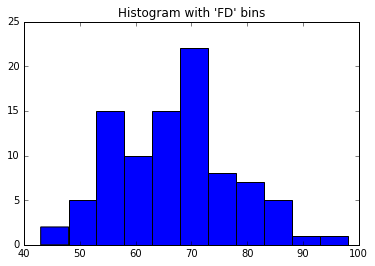

In [131]:
weights = pandas.read_csv("static/Data/StudentWeights.csv")

fig, ax = plt.subplots()
plt.hist(weights['Weight'], bins='fd')  # arguments are passed to np.histogram
plt.title("Histogram with 'FD' bins")
plt.show()

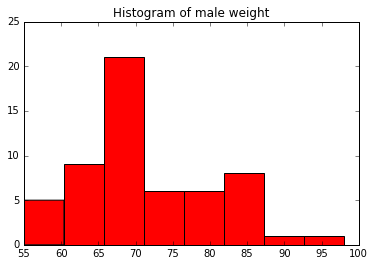

In [132]:
# plot by Sex
plt.hist(weights[weights['Sex']=='M']['Weight'], bins='fd', color='red')  # arguments are passed to np.histogram
plt.title("Histogram of male weight")
plt.show()


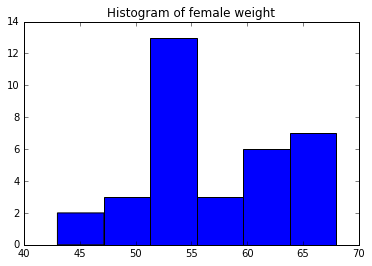

In [133]:
plt.hist(weights[weights['Sex']=='F']['Weight'], bins='fd', color='blue')  # arguments are passed to np.histogram
plt.title("Histogram of female weight")
plt.show()


### Histogram using polar coordinates

An early important use of a **polar coordinate / radial axis histogram / circular histogram / Coxcomb chart / polar area diagram** 
was by Florence Nigthingale 
- Crimean War 
- 1853 - 1856
- Russia vs Alliance (Ottoman Empire, France, Britain, Sardinia)

Florence Nightingale used the statistics and the "Nightingale rose diagram" 
- to convince the British *Members of Parliament* 
- to improve sanitation and medical conditions

![Nightingale Rose](static/Figures/NightingaleRose.png "Nightingale Rose Diagram")

Point out that the male and female   
ranges are different
extreme values (male)  
dispersion  
A few large males could be due to Rugby players 

In [134]:
# Ideal data for student weights
Mmed = weights.Weight[weights.Sex=="M"].median()
Fmed = weights.Weight[weights.Sex=="F"].median()
Mdev = (weights.Weight[weights.Sex=="M"].quantile(.75) - weights.Weight[weights.Sex=="M"].quantile(.25))/2
Fdev = (weights.Weight[weights.Sex=="F"].quantile(.75) - weights.Weight[weights.Sex=="F"].quantile(.25))/2
Mn = weights.Weight[weights.Sex=="M"].count()
Fn = weights.Weight[weights.Sex=="F"].count()
print('Mmed:  %6.3f\tFmed:  %6.3f' %( Mmed, Fmed ) )
print('Mdev:  %6.3f\tFdev:  %6.3f' %( Mdev, Fdev ) )

males = np.random.normal(Mmed,Mdev,Mn)
females = np.random.normal(Fmed,Fdev,Fn)
sex=np.array(['M','F'])
sex=np.repeat(sex,[Mn,Fn],axis=0)

newWeights = pandas.DataFrame({'Sex':sex,'NormWeight':np.concatenate([males,females])})


Mmed:  70.000	Fmed:  55.000
Mdev:   5.500	Fdev:   3.500


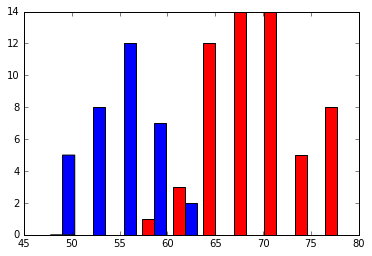

In [135]:
a1 = plt.hist( [males,females] , bins=10, color=('red','blue'), histtype='bar')

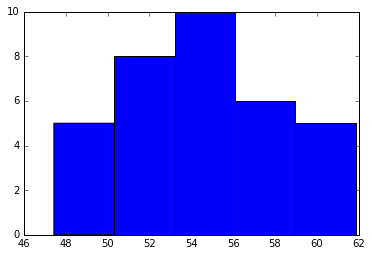

In [136]:
a2 = plt.hist(newWeights[newWeights.Sex=="F"]['NormWeight'], bins='fd', color='blue')

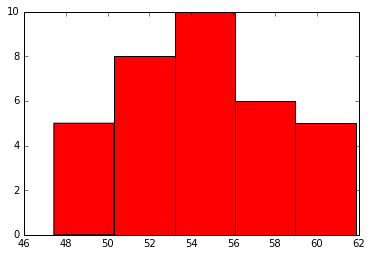

In [137]:
a3 = plt.hist(newWeights[newWeights.Sex=="F"]['NormWeight'], bins='fd', color='red')

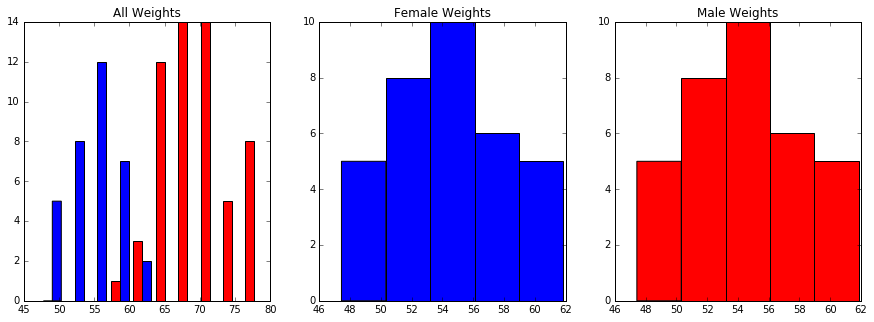

In [138]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,5) )
ax0, ax1, ax2 = axes.flatten()
ax0.hist( [males,females] , bins=10, color=('red','blue'), histtype='bar')
ax0.set_title("All Weights")
ax1.hist(newWeights[newWeights.Sex=="F"]['NormWeight'], bins='fd', color='blue')  
ax1.set_title("Female Weights")
ax2.hist(newWeights[newWeights.Sex=="F"]['NormWeight'], bins='fd', color='red') 
ax2.set_title("Male Weights")

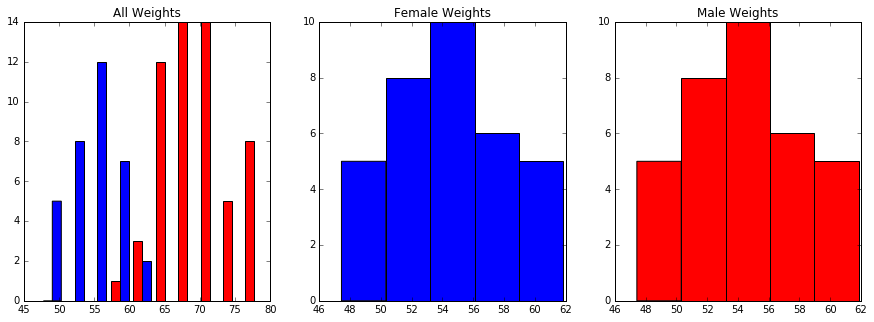

In [139]:
fig

## Summary statistics

What other features can we use to describe the appearance of the data?  

Summary statistics:  
- Single values that describe properties of the data

Let us look at the dot plot again:


![Class Weights](static/Figures/StudentWeight_DotPlot.png "Dot Plot of Weights")


## Measures of dispersion

Dispersion: the action or process of distributing things or people over a wide area.
- Scatter
  
<p>  
Summarize whether data are  
  - Close together  
  - Far apart  
  


### Measures of dispersion
  
Statistics  
**- Range**  
**- Variance**  
**- Standard Deviation**  
**- Interquartile Range (IQR)**  


Range is simple, others more complex


#### Calculating the statistics

##### Range

$\max x - \min x$

In [140]:
## Use the numpy ptp function to return range

wRange = np.ptp(weights['Weight'])
print(wRange)

55


##### Variance

$s^2=\frac{\sum\limits_{i=1}^{n} (x_i - \bar x)^2}{n-1}$  
where:
$\bar x$ is the *mean of x*

Remember:  
${\sum\limits_{i=1}^{n}} (x_i - \bar x) = 0$  
where:
$x_i - \bar x$ is defined as the *deviant*

Ask for explanations from the audience.

##### Variance

The **(n-1)** denominator in the formula is for the variance of a **sample**  

Asymptotically (when n gets very large), the value of the variance approaches (x - mean(x))<sup>2</sup>/n  
- because n is approximately n-1 for very large n  

The **population variance** uses a denominator of **n**



In [141]:
print("Numpy:      ", np.var(weights['Weight'],ddof=1))  

print("Numpy:      ", round(np.var(weights['Weight'],ddof=1),2))

from statistics import variance
print("Statistics: ", variance(weights['Weight']))


Numpy:       112.752869353
Numpy:       112.75
Statistics:  112


##### Variance -- observations

In the numpy *var()* function we specify *ddof* (delta degrees of freedom) which represents the $-1$  (Bessel's correction) of the $n-1$ denominator in our equation:  
$s^2=\frac{\sum\limits_{i=1}^{n} (x_i - \bar x)^2}{n-1}$ 
  
<p>  
<p>  
Curiously, the implementation of *variance* from statistics returns a value that is smaller than the one computed by the *numpy var* function.    
**112.75 is the correct answer.** 

##### Variance -- observations

Variance has squared units
- for weight the units will be $kg^2$
- its magnitude is not of the same order as the original scale

##### Standard deviation

Remember that variance is a function of  
- **squared deviants**  or **squared deviations**  
- scaled by the number of observations **(n)**  

The **standard deviation** is the square root of the variance  

$s=\sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \bar x)^2}{n-1}}$ 
  
It returns the measure of dispersion to the original scale

##### Standard deviation

Since  **population** and **sample** variance differ in the denominator  
- population is **n**  
- sample is **n-1** 
  
So **population** and **sample** standard deviation differ in the denominator  

##### Interquartile range

Median is the middle value or 50<sup>th</sup> percentile 
Quartiles 
- Divide distribution into 4 groups of the same number
- (0), 25, 50, 75, 100 percentiles
- (Q<sub>0</sub>), Q<sub>1</sub>, Q<sub>2</sub>, Q<sub>3</sub>, Q<sub>4</sub>

$ IQR = Q_3 - Q_1$

In [142]:
x  = np.percentile(weights[weights.Sex=="M"]['Weight'], [75, 25])
print("IQR for males  : %4.1f" % (x[0]-x[1]) )
x  = np.percentile(weights[weights.Sex=="F"]['Weight'], [75, 25])
print("IQR for females: %4.1f" % (x[0]-x[1]) )

IQR for males  : 11.0
IQR for females:  7.0


#### Box and whiskers plot

Used to represent Median, IQR and range (min,max)  
Outliers are take as 1.5 times IQR 
- \> Q<sub>2</sub> + 1.5 \* IQR
- < Q<sub>1</sub> - 1.5 \* IQR
- removed from range and range extended to (min,max) of non-outliers  

B & W plots  
- Good for asymmetric distributions  
- Small-sample distributions  
  


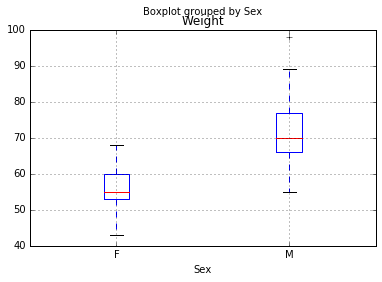

In [143]:
weights.boxplot('Weight', by='Sex')

## Properties of x-bar and s, median and IQR

We use the pairs of statistics when 
- Mean ($\large \bar x $) and standard devation (s)  
  -- distribution symmetrical  
  -- no outliers  
- Median and IQR  
  -- distribution NOT symmetrical  
  -- outlers  


## Z and Standard Normal

Unimodal symmetrical distributions differ in
- mean ($\bar x$)
- SD (s)

## Z and Standard Normal
Standardizing distributions 

$z_i=\frac{x_i - \bar x}{s}$  

- Permits comparison of any unimodal symmetrical distributions  
- This standardization procedure is a **normalization** procedure
- Called the *Z* transformation

In [144]:
import matplotlib.mlab as mlab
import math
from scipy.stats.kde import gaussian_kde

x = np.random.normal(0,1,10000) # generate some random normally distributed data
kde = gaussian_kde( x ) ## Generate Gaussian kernel density
dist_space = np.linspace( min(x), max(x), 200 )

mu, variance = (0,1)
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

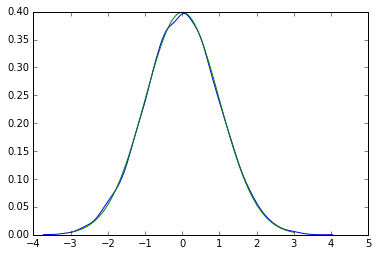

In [145]:
plt.plot(dist_space,kde(dist_space)) # Make default density plot
plt.plot(x,mlab.normpdf(x, mu, sigma)) # Make density plot of mathematical Normal
plt.show()

# Summary

We have  
1. Displayed data in a few ways  
2. Defined several measures of centrality  
3. Defined several measures of dispersion  
4. Encountered "mound-shaped" distributions
   1. Normal
   2. Z